# Capital Asset Pricing Model (CAPM)

 - In order to measure the performance of a particular security or fund against that of benchmark portfolio, the **security characteristic lines** (SCL) are very useful.

 - The SCL line is:
 $$\mathbb{E}(R_i)-R_F=\alpha_i+\beta_i(\mathbb{E}(R_i)-R_F)$$
 where $\alpha_i$ is active return.

### Security Market Line
$$\mathbb{E}(R_i)=R_F+\alpha_i+\beta_i\mathbb{E}(R_M-R_F)$$

### Factor Model

 - Factor models generalize the CAPM by allowing more factors than simply the market risk and the unexplained unique risk of each asset.

 - The model is defined as,
    $$R_i−R_F=\beta_{0i}+\beta_{1i}x_1+...+\beta_{pi}x_p+\epsilon_i$$

where $x_1,x_2,...,x_p$ are the $p$ factors.

In [1]:
library(tseries)
options(repr.plot.width=6, repr.plot.height=4)

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


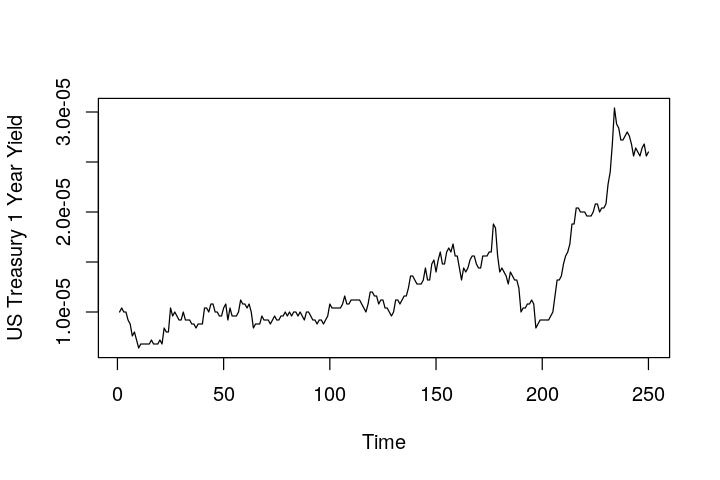

In [2]:
data<-read.csv("../Data/stock_treasury.csv")
# Risk Free Rate is in percentage and annualised. 
# So the following conversion is required.
Rf<-data$UST_Yr_1/(100*250)
plot(ts(Rf),ylab="US Treasury 1 Year Yield")

In [3]:
n<-nrow(data)

## Compute log-return
ln_rt_snp500<-diff(log(data$SnP500))-Rf[2:n]
ln_rt_ibm<-diff(log(data$IBM_AdjClose))-Rf[2:n]
ln_rt_apple<-diff(log(data$Apple_AdjClose))-Rf[2:n]
ln_rt_msft<-diff(log(data$MSFT_AdjClose))-Rf[2:n]
ln_rt_intel<-diff(log(data$Intel_AdjClose))-Rf[2:n]

In [4]:
## log-return of the portfolio
ln_r <- cbind(ln_rt_ibm,ln_rt_apple,ln_rt_msft,ln_rt_intel)
head(ln_r)

ln_rt_ibm,ln_rt_apple,ln_rt_msft,ln_rt_intel
-0.015870443,-2.858644e-02,-0.00924877,-0.011350577
-0.021811910,8.413819e-05,-0.01479610,-0.018822896
-0.006567005,1.391479e-02,0.01261529,0.020748139
0.021492855,3.769331e-02,0.02898454,0.018420655
0.004337269,1.063127e-03,-0.00844949,0.001897247
-0.016930825,-2.495693e-02,-0.01258907,-0.004369651


In [5]:
w = c(0.2,0.3,0.25,0.25)
ln_rt_portf = ln_r%*%w

capm_ibm<-lm(ln_rt_ibm~ln_rt_snp500)
capm_ibm_analysis<-coefficients(summary(capm_ibm))
capm_ibm_analysis <- round(capm_ibm_analysis,digits = 5)
rownames(capm_ibm_analysis)<-c("alpha","beta")
## Result of capm using lm() for IBM
capm_ibm_analysis

,Estimate,Std. Error,t value,Pr(>|t|)
alpha,-0.00050,0.00058,-0.86605,0.3873
beta,1.01601,0.05863,17.32801,0.0000


[1] 0.5468333

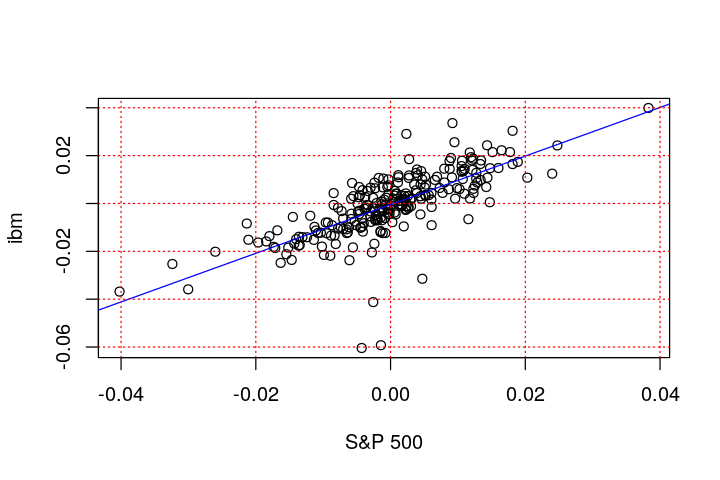

In [6]:
plot(ln_rt_snp500,ln_rt_ibm,xlab="S&P 500",ylab="ibm")
abline(capm_ibm,col="blue")
grid(col="red")
## Adjusted R-Squareed
summary(capm_ibm)$adj.r.squared

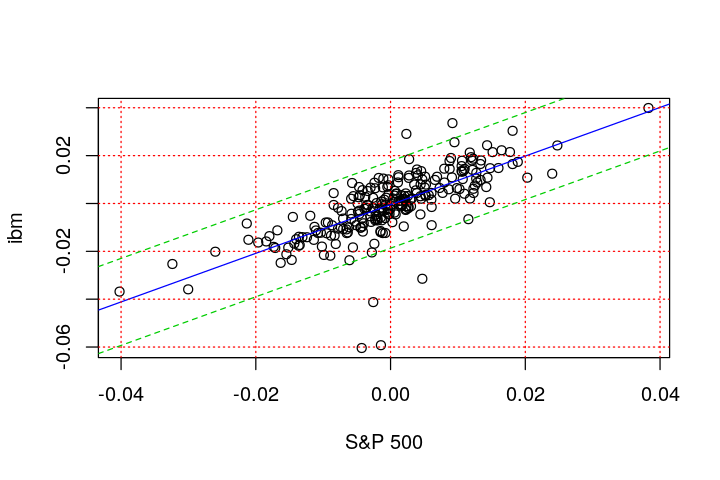

In [7]:
plot(ln_rt_snp500,ln_rt_ibm,xlab="S&P 500",ylab="ibm")
abline(capm_ibm,col="blue")
grid(col="red")
rse<-summary(capm_ibm)$sigma
al <-capm_ibm$coefficients[1]-2*rse
b <- capm_ibm$coefficients[2]
abline(a= al,b= b,col=3,lty=2)
au <-capm_ibm$coefficients[1]+2*rse
abline(a=au,b=b,col=3,lty=2)

#### CAPM on Microsoft

In [8]:
capm_msft<-lm(ln_rt_msft~ln_rt_snp500)
## Adjusted R-Squareed
summary(capm_msft)$adj.r.squared

[1] 0.4736175

#### CAPM on Apple

In [9]:
capm_msft<-lm(ln_rt_msft~ln_rt_snp500)
## Adjusted R-Squareed
summary(capm_msft)$adj.r.squared

[1] 0.4736175

#### CAPM on Intel

In [10]:
capm_intel<-lm(ln_rt_intel~ln_rt_snp500)
## Adjusted R-Squareed
summary(capm_intel)$adj.r.squared

[1] 0.4085883

#### CAPM on Portfolio

In [11]:
capm_portf<-lm(ln_rt_portf~ln_rt_snp500)
capm_portf_analysis<-round(coefficients(summary(capm_portf)),digit=5)
rownames(capm_portf_analysis)<-c("alpha","beta")
## Result of capm using lm() for Microsoft
capm_portf_analysis

,Estimate,Std. Error,t value,Pr(>|t|)
alpha,0.00008,0.00044,0.17406,0.86196
beta,1.11029,0.04434,25.04207,0.00000


#### Adjusted R-Squareed

In [12]:
summary(capm_portf)$adj.r.squared

[1] 0.7162813